<a href="https://colab.research.google.com/github/mitul01/FER/blob/main/predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
!pip install Pillow
import PIL
from PIL import Image

In [41]:
class test_image:
  

  def __init__(self,target_dim,target_channels,path):
    self.target_dim=target_dim
    self.target_channels=target_channels
    self.path=path

  def show_image(self):
    from matplotlib import image
    from matplotlib import pyplot
    image = image.imread(self.path)
    pyplot.imshow(image)
    pyplot.show()

  def preprocess_image(self):
    from keras.preprocessing.image import img_to_array,array_to_img
    image_pil = Image.open(self.path)
    data = img_to_array(image_pil)
    return data

  def gray2RGB(self,x):
    if len(x.shape)==2:
      return np.stack((x,x,x),-1)
    else:
      assert len(x.shape)==self.target_channels
      if len(x[0,0,:]) == 1:
        return np.stack((x[:,:,0],x[:,:,0],x[:,:,0]),-1)
      else:
        assert len(x[0,0,:])==3
      return x  

  def prepare_image(self):
    from keras.applications.resnet50 import preprocess_input
    import cv2
    from math import floor
    data=self.preprocess_image()
    x = cv2.resize(data,self.target_dim,interpolation=cv2.INTER_CUBIC)
    x = self.gray2RGB(x)
    x=preprocess_input(x)
    return x

In [42]:
class predict_emotion:
  
  def __init__(self,image_path,model_path):
    self.model_path=model_path
    self.image_path=image_path
  
  def get_emotion(self):
    from keras.models import load_model
    from keras.preprocessing.image import array_to_img,img_to_array
    import numpy as np
    ti=test_image(target_dim=(224,224),target_channels=3,path=self.image_path)
    m=load_model(self.model_path)
    emotion_dict = {0: 'Angry',1: 'Fear', 2: 'Sad', 3: 'Happy', 4: 'Surprise', 5:'Neutral'}
    test=ti.prepare_image()
    test=test.reshape(-1,*(224,224),3)
    a=m.predict(test)
    label=np.argmax(a)
    emotion=emotion_dict.get(label,"Unable to predict!,Try Again")
    print("  ====================" + emotion + "====================  ")
    ti.show_image()

In [43]:
PATH2='/content/drive/MyDrive/colab-20210303T131708Z-001/colab/predict/image3.jpg'
PATH3='/content/drive/MyDrive/colab-20210303T131708Z-001/colab/predict/image2.jpg'
Path4='/content/drive/MyDrive/colab-20210303T131708Z-001/colab/predict/yogi.jpeg'
MODEL_PATH="/content/drive/MyDrive/colab-20210303T131708Z-001/colab/TransferLearning_ResNet50_oversampling_smoothLabels.h5"

  ====================Happy====================  


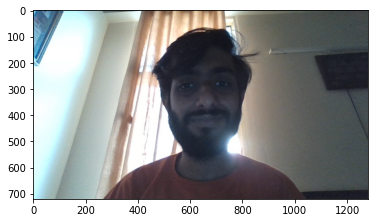

In [44]:
pe=predict_emotion(PATH2,MODEL_PATH)
pe.get_emotion()

  ====================Surprise====================  


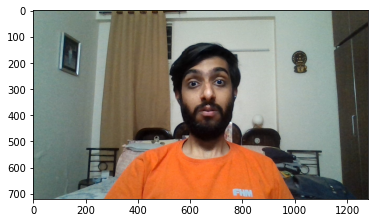

In [45]:
pe1=predict_emotion(PATH3,MODEL_PATH)
pe1.get_emotion()